# Init

In [42]:
!pip install yellowbrick

In [43]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import utils
import pandas as pd
import math
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [44]:
digits = load_digits()
x, y = digits.data, digits.target
labels = digits.target_names

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [46]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Clusterização K-Médias

N Clusters: 2 Avg: 0.10073495234153171
N Clusters: 3 Avg: 0.08928914344510806
N Clusters: 4 Avg: 0.09702251553197161
N Clusters: 5 Avg: 0.09734749197616502
N Clusters: 6 Avg: 0.09756314256120578
N Clusters: 7 Avg: 0.11645652773527786
N Clusters: 8 Avg: 0.12810377054070538
N Clusters: 9 Avg: 0.12643711324196627
N Clusters: 10 Avg: 0.12073227783170157
N Clusters: 11 Avg: 0.1373519330543896
N Clusters: 12 Avg: 0.1371900630232791
N Clusters: 13 Avg: 0.15016607491414605
N Clusters: 14 Avg: 0.1533497352726495
N Clusters: 15 Avg: 0.15563725948818624


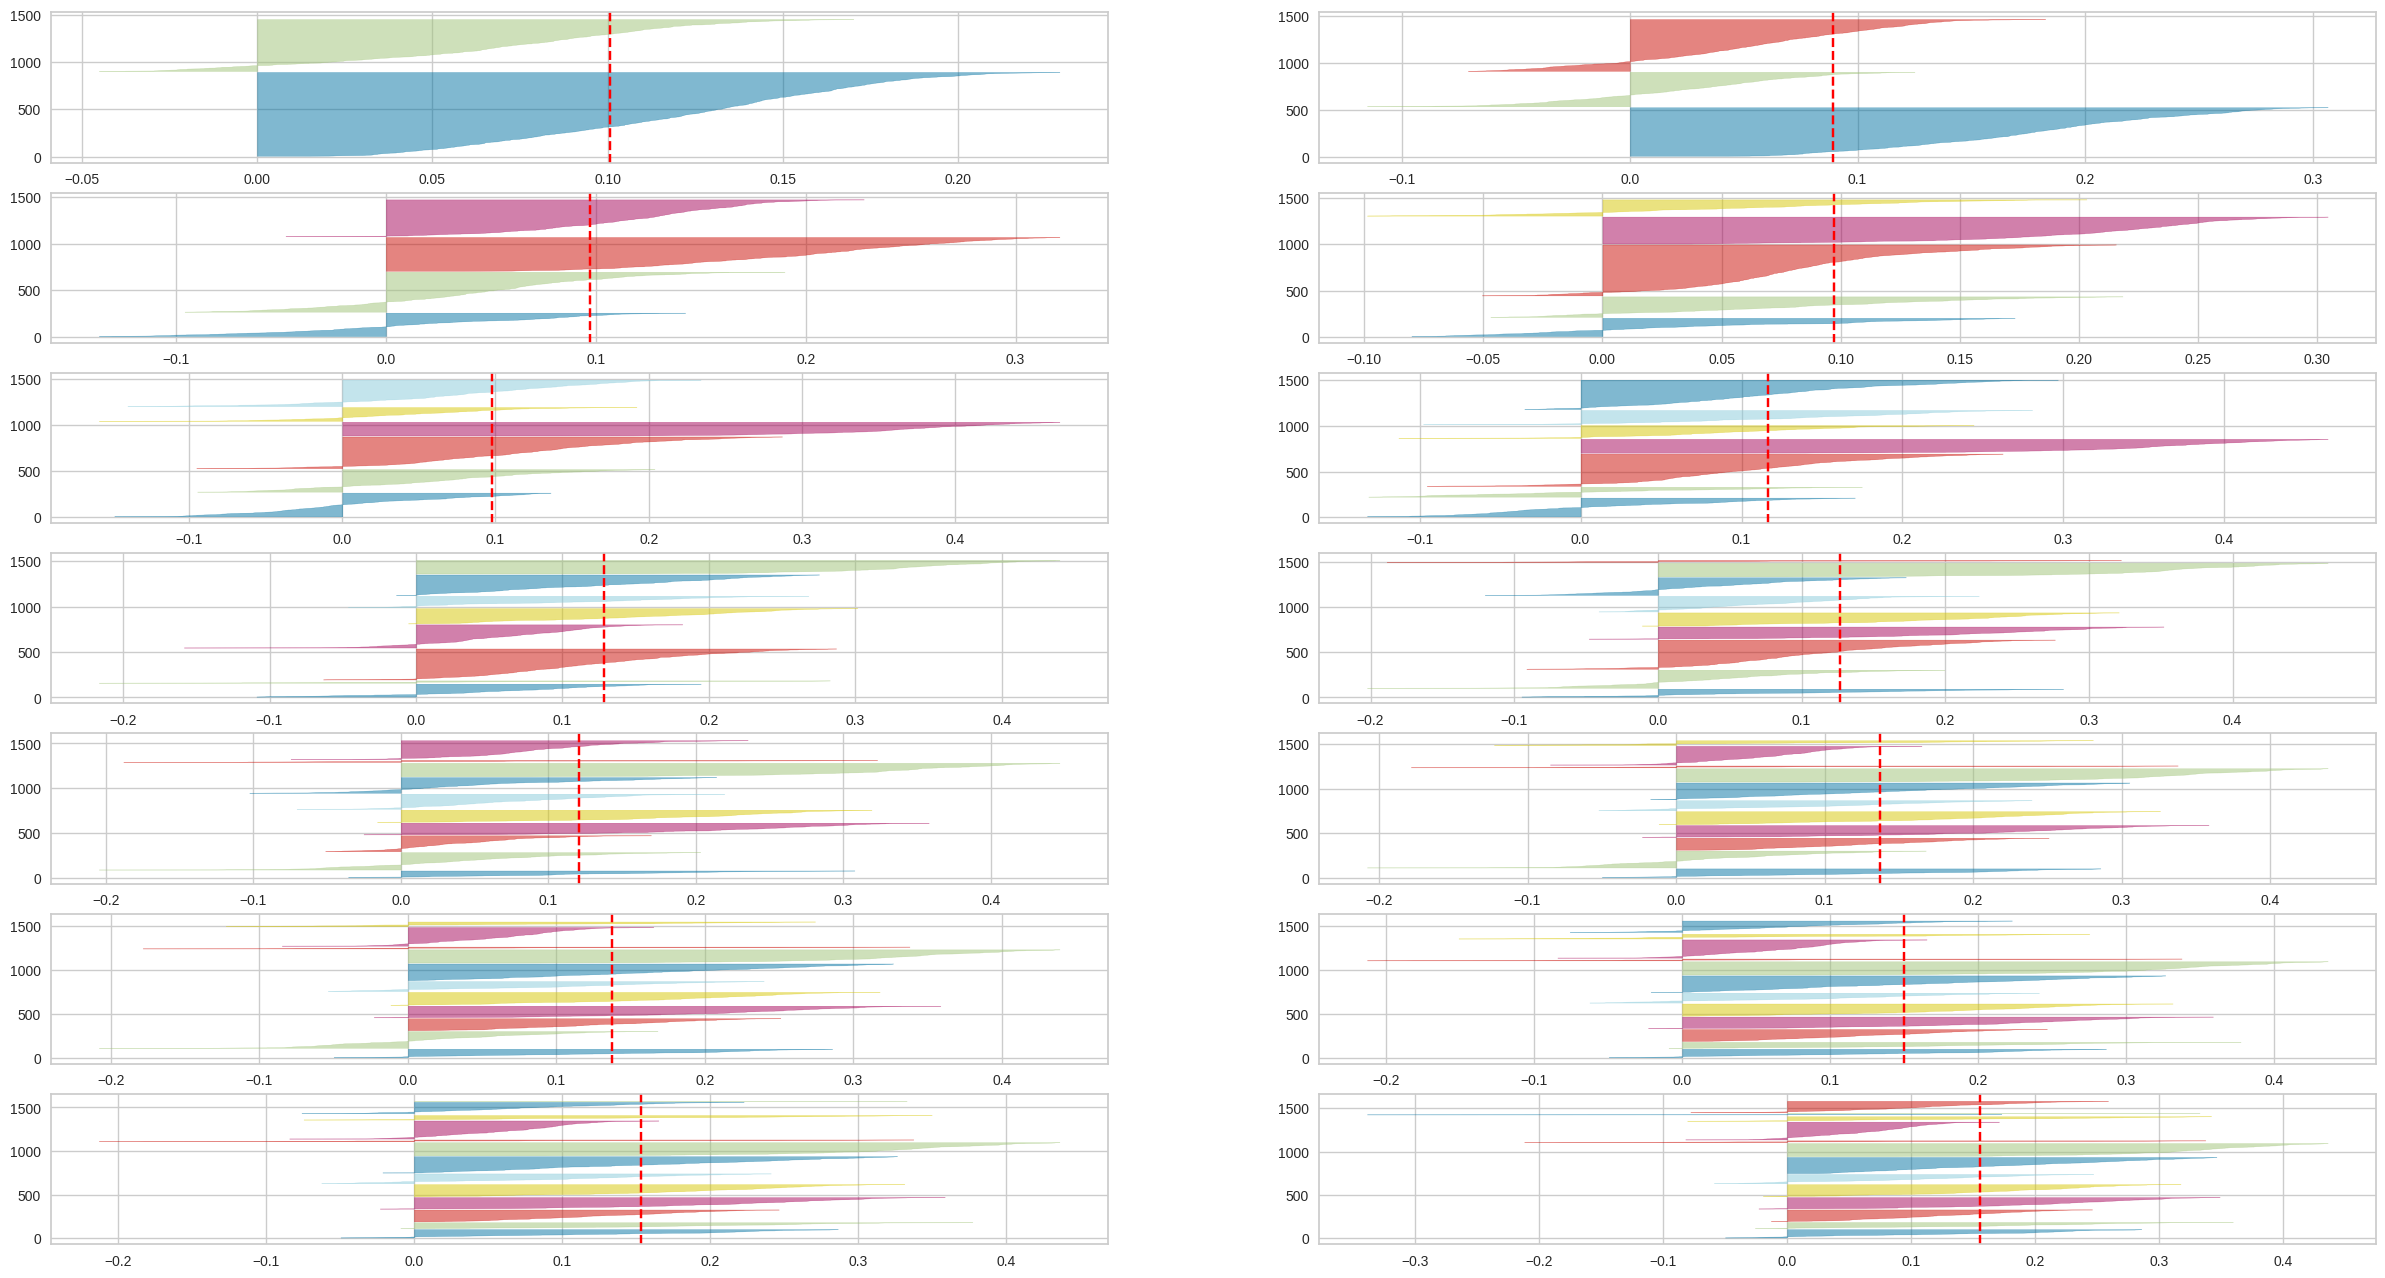

In [47]:
silhouette_scores, range_k = utils.visualize_silhouette(x_train, 15)

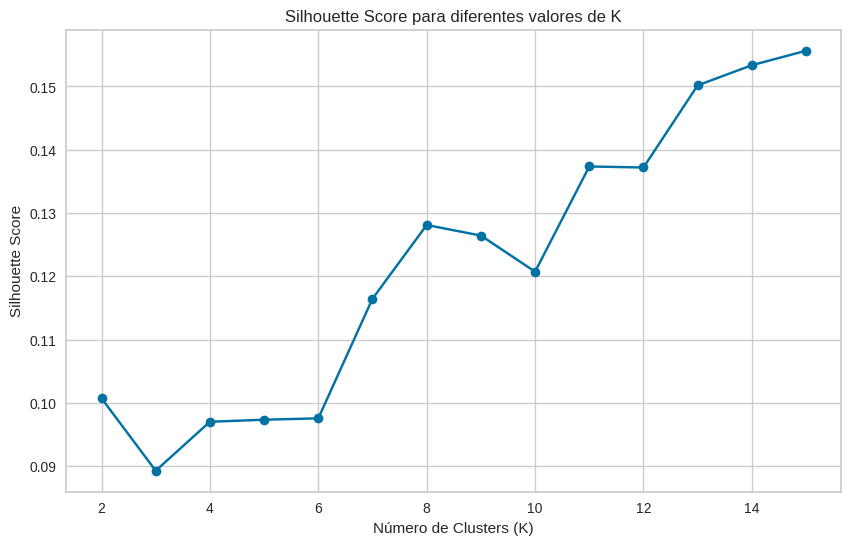

In [48]:
utils.visualize_sil_score_per_cluster(silhouette_scores, range_k)

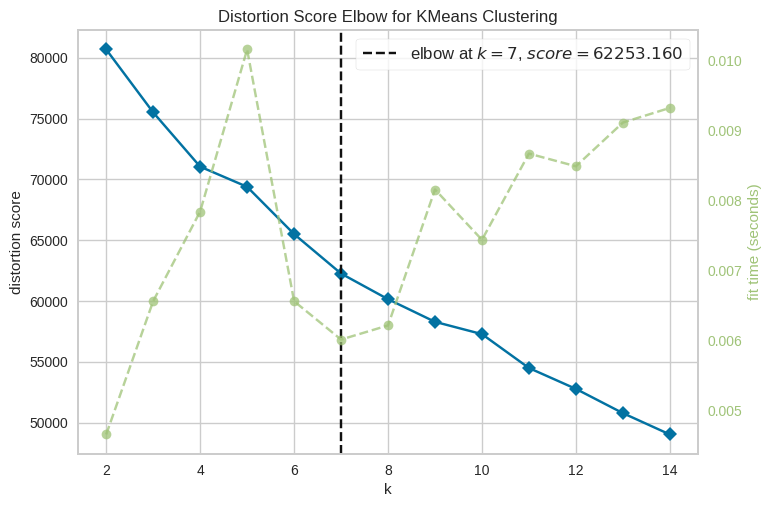

In [49]:
utils.visualize_elbow(x_train, 15)

# Criação de Features

In [50]:
n = 2

In [51]:
km = KMeans(n_clusters=n, random_state=0)
clusters = km.fit_predict(x_train)
centroids = km.cluster_centers_

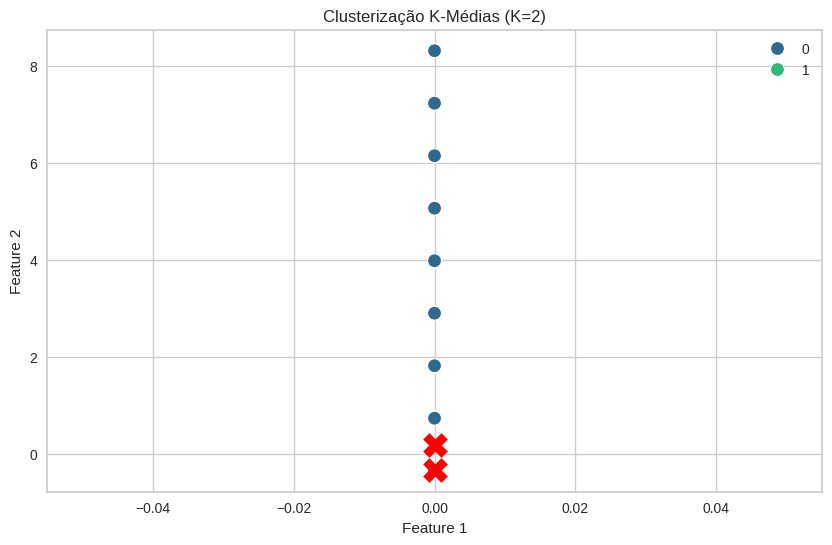

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=clusters, palette='viridis', s=100)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title(f"Clusterização K-Médias (K={n})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [53]:
x_train_mod, x_test_mod = utils.criar_features_dataset(x_train, x_test, centroids)

In [54]:
x_train_mod

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,F0,F1
0,0.0,-0.337904,-1.091416,-0.649132,0.734809,-0.678265,-0.407648,-0.122381,-0.055763,-0.626063,...,-0.026389,-0.301406,-1.086578,-1.144186,0.653379,1.583258,3.531256,3.302133,10.865702,11.292683
1,0.0,2.906429,1.416964,0.050295,0.500004,-0.325317,-0.407648,-0.122381,-0.055763,-0.311829,...,-0.026389,1.765996,1.446284,0.894073,0.858829,1.583258,0.005958,-0.186959,6.495741,9.335984
2,0.0,0.743540,0.998901,0.749722,0.969615,1.262951,0.499616,-0.122381,-0.055763,0.945108,...,-0.026389,-0.301406,1.835955,0.214653,-0.990220,-1.144934,-0.497656,-0.186959,7.248531,8.143949
3,0.0,-0.337904,-1.091416,0.050295,-1.848053,-1.031214,-0.407648,-0.122381,-0.055763,-0.626063,...,-0.026389,-0.301406,-1.086578,-0.238293,-0.579320,-1.144934,-0.497656,-0.186959,7.505664,5.814705
4,0.0,-0.337904,-1.091416,-0.649132,0.969615,-0.501791,-0.407648,-0.122381,-0.055763,-0.626063,...,-0.026389,-0.301406,-1.086578,-0.011820,0.037030,-1.144934,-0.497656,-0.186959,8.144118,6.374655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,0.0,0.743540,0.580838,0.516580,0.734809,-0.678265,-0.407648,-0.122381,-0.055763,0.002405,...,-0.026389,0.732295,0.666942,-0.011820,0.242480,0.389674,-0.497656,-0.186959,5.627982,7.058624
1433,0.0,1.824985,0.789869,0.749722,0.969615,1.615900,0.197195,-0.122381,-0.055763,2.830513,...,-0.026389,-0.301406,1.251449,0.894073,0.653379,0.389674,-0.245849,-0.186959,7.151487,9.409143
1434,0.0,-0.337904,-0.046258,0.516580,0.500004,-0.678265,-0.407648,-0.122381,-0.055763,0.002405,...,-0.026389,-0.301406,0.666942,0.214653,-2.428370,-1.144934,-0.497656,-0.186959,7.235407,5.950477
1435,0.0,-0.337904,-0.255289,-0.415990,0.734809,1.792374,0.802037,-0.122381,-0.055763,-0.626063,...,-0.026389,-0.301406,0.082436,0.894073,-1.606570,-1.144934,-0.497656,-0.186959,7.237667,5.328893


In [55]:
x_test_mod

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,F0,F1
0,0.0,-0.337904,1.207933,0.982865,0.734809,-0.501791,-0.407648,-0.122381,-0.055763,0.945108,...,-0.026389,-0.301406,1.446284,0.214653,-0.784770,1.071722,3.531256,4.465164,7.941774,9.286417
1,0.0,0.743540,2.044059,0.516580,-2.317664,-1.031214,-0.407648,-0.122381,-0.055763,1.259342,...,-0.026389,0.732295,1.835955,0.894073,0.037030,-0.974422,-0.497656,-0.186959,7.469506,8.539771
2,0.0,1.824985,1.625996,0.982865,-0.439219,-1.031214,-0.407648,-0.122381,-0.055763,3.144747,...,-0.026389,0.732295,1.446284,0.894073,0.858829,1.583258,3.531256,1.557587,7.707252,10.017635
3,0.0,-0.337904,0.789869,-1.115417,-2.787275,-1.031214,-0.407648,-0.122381,-0.055763,-0.626063,...,-0.026389,-0.301406,0.277271,0.441126,0.858829,0.901210,-0.245849,-0.186959,7.200375,8.508582
4,0.0,-0.337904,-0.464321,0.283438,-1.378441,-1.031214,-0.407648,-0.122381,-0.055763,-0.626063,...,-0.026389,-0.301406,-0.502071,0.214653,0.653379,0.219162,-0.497656,-0.186959,6.052641,7.455290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.0,-0.337904,-0.464321,-0.882274,-0.204413,1.262951,3.826249,-0.122381,-0.055763,0.002405,...,-0.026389,-0.301406,-0.696907,-0.011820,0.242480,-0.803910,-0.497656,-0.186959,7.561585,6.801881
356,0.0,-0.337904,-1.091416,-0.649132,-0.204413,-1.031214,-0.407648,-0.122381,-0.055763,-0.626063,...,-0.026389,-0.301406,-1.086578,-0.238293,-0.990220,-1.144934,-0.497656,-0.186959,7.326156,5.371787
357,0.0,0.743540,0.789869,0.982865,0.969615,1.086477,-0.105227,-0.122381,-0.055763,-0.626063,...,-0.026389,-0.301406,0.861778,0.894073,-0.168420,-0.462886,-0.497656,-0.186959,6.625738,6.376710
358,0.0,-0.337904,-1.091416,-2.047986,0.500004,1.262951,0.499616,-0.122381,-0.055763,-0.626063,...,-0.026389,-0.301406,-1.086578,-2.050079,0.242480,1.412746,0.005958,-0.186959,7.539040,6.168442


# SVM

## Modelo de ML

In [56]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

### Dataset Original

In [57]:
svc_ori = SVC(probability=True)

In [58]:
grid_ori = GridSearchCV(estimator=svc_ori, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [59]:
grid_ori.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

### Dataset Modificado

In [60]:
svc_mod = SVC(probability=True)

In [61]:
grid_mod = GridSearchCV(estimator=svc_mod, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [62]:
grid_mod.fit(x_train_mod, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

## Avaliação dos Modelos

### Dataset Original

In [63]:
y_pred = utils.show_estimator_results(grid_ori, x_test, y_test)

Melhores parâmetros GridSearch: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Score GridSearch: 0.9861111111111112

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.97      0.99        35
           2       1.00      0.97      0.99        36
           3       1.00      1.00      1.00        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        44
           7       0.97      0.97      0.97        39
           8       0.95      1.00      0.97        39
           9       0.98      1.00      0.99        41

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



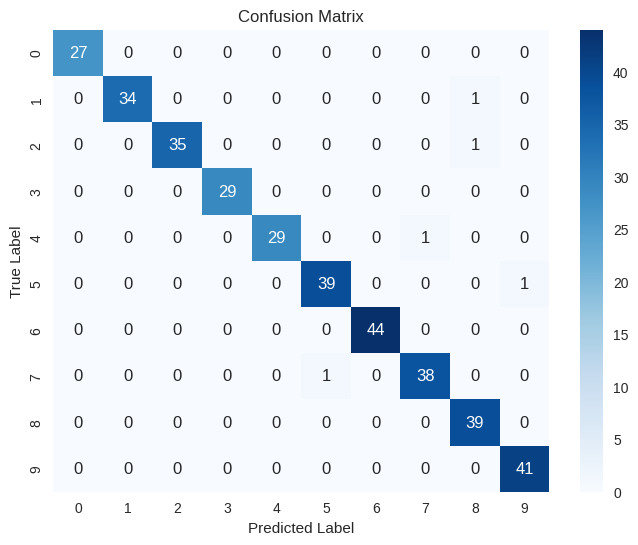

In [64]:
utils.show_cm(y_test, y_pred, labels)

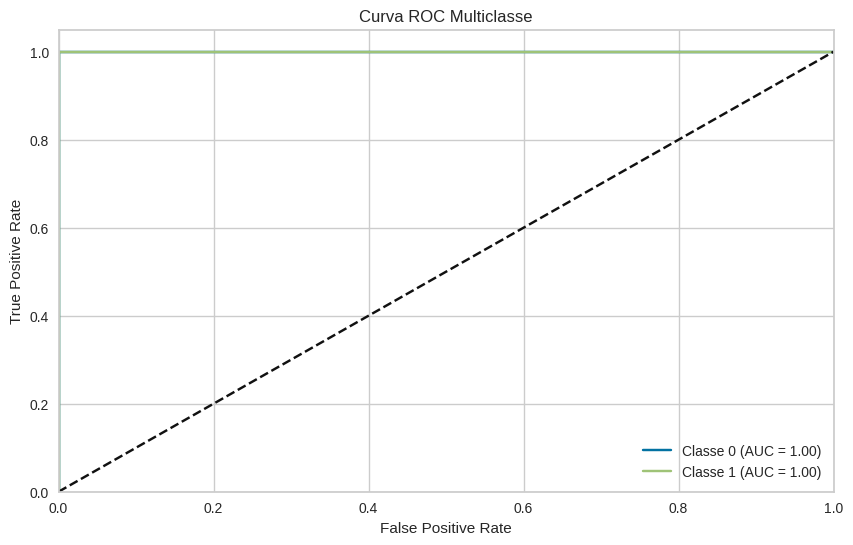

In [65]:
# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

y_score = grid_ori.best_estimator_.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n):  # número de classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(n):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()

### Dataset Modificado

In [66]:
y_pred = utils.show_estimator_results(grid_mod, x_test_mod, y_test)

Melhores parâmetros GridSearch: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
Score GridSearch: 0.975

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.92      0.97      0.94        35
           2       1.00      0.97      0.99        36
           3       1.00      1.00      1.00        29
           4       0.91      1.00      0.95        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       0.97      0.97      0.97        39
           8       1.00      0.95      0.97        39
           9       0.97      0.95      0.96        41

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



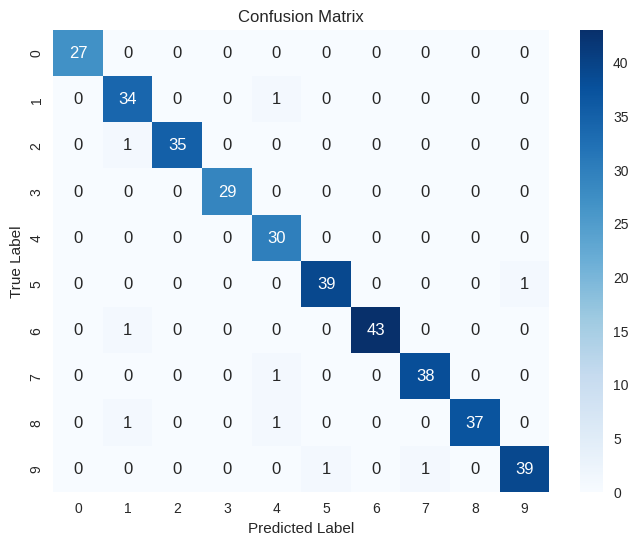

In [67]:
utils.show_cm(y_test, y_pred, labels)

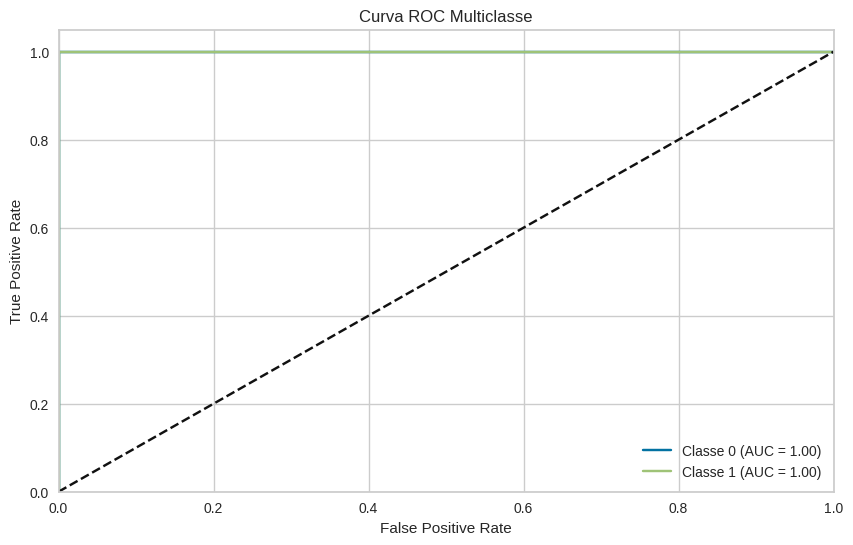

In [68]:
# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

y_score = grid_ori.best_estimator_.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n):  # número de classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(n):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()

# Random Forest

## Modelo de ML

In [69]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
}

### Dataset Original

In [70]:
rf_ori = RandomForestClassifier()

In [71]:
grid_ori = GridSearchCV(estimator=rf_ori, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [72]:
grid_ori.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

### Dataset Modificado

In [73]:
rf_mod = RandomForestClassifier()

In [74]:
grid_mod = GridSearchCV(estimator=rf_mod, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [75]:
grid_mod.fit(x_train_mod, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

## Avaliação dos Modelos

### Dataset Original

In [76]:
y_pred = utils.show_estimator_results(grid_ori, x_test, y_test)

Melhores parâmetros GridSearch: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Score GridSearch: 0.9777777777777777

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.95      1.00      0.97        35
           2       1.00      0.94      0.97        36
           3       0.94      1.00      0.97        29
           4       1.00      0.97      0.98        30
           5       1.00      0.97      0.99        40
           6       1.00      1.00      1.00        44
           7       0.95      1.00      0.97        39
           8       1.00      0.92      0.96        39
           9       0.98      0.98      0.98        41

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



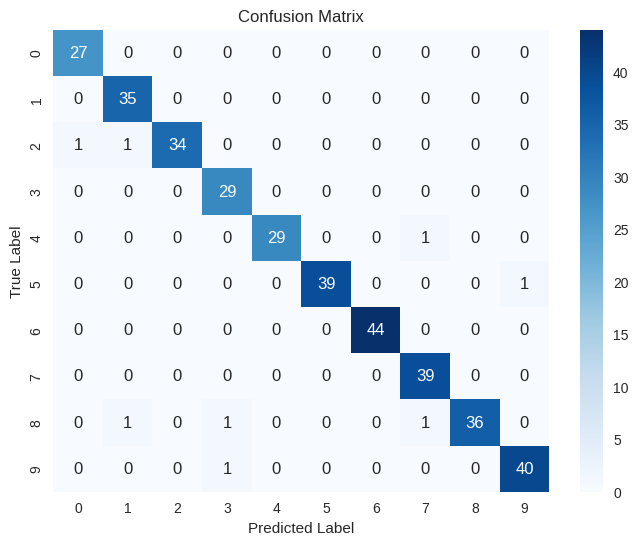

In [77]:
utils.show_cm(y_test, y_pred, labels)

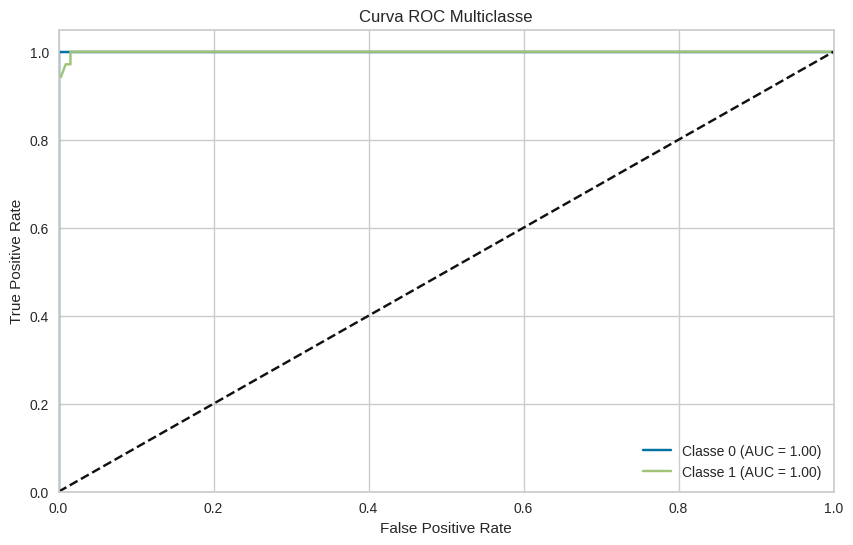

In [78]:
# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

y_score = grid_ori.best_estimator_.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n):  # número de classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(n):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()

### Dataset Modificado

In [79]:
y_pred = utils.show_estimator_results(grid_mod, x_test_mod, y_test)

Melhores parâmetros GridSearch: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Score GridSearch: 0.9638888888888889

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.92      0.97      0.94        35
           2       1.00      0.94      0.97        36
           3       0.91      1.00      0.95        29
           4       1.00      0.97      0.98        30
           5       0.93      0.95      0.94        40
           6       1.00      0.98      0.99        44
           7       0.95      1.00      0.97        39
           8       1.00      0.92      0.96        39
           9       0.97      0.93      0.95        41

    accuracy                           0.96       360
   macro avg       0.96      0.97      0.96       360
weighted avg       0.97      0.96      0.96       360



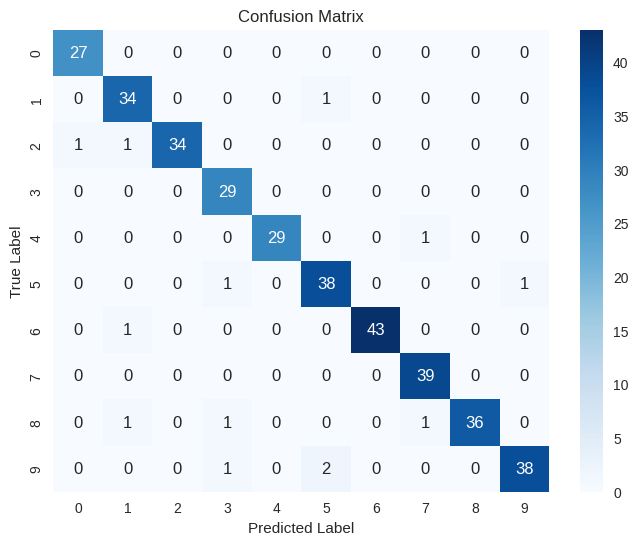

In [80]:
utils.show_cm(y_test, y_pred, labels)

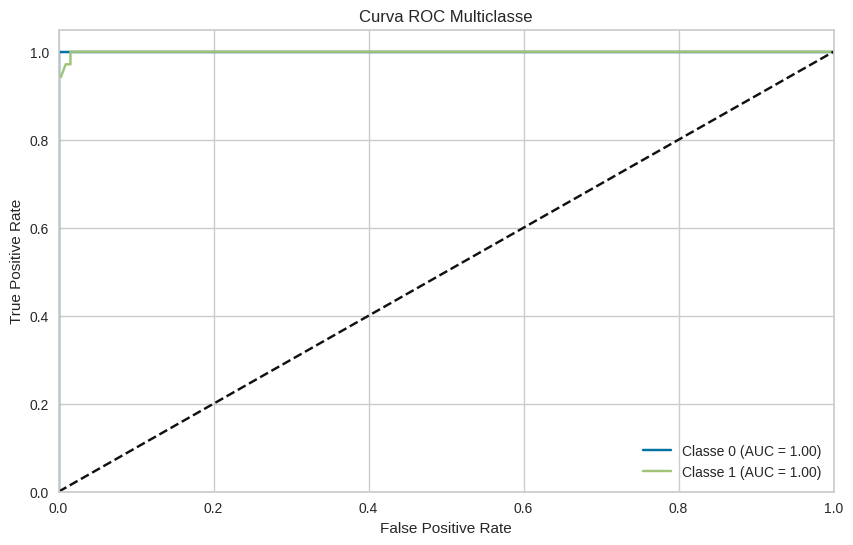

In [81]:
# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

y_score = grid_ori.best_estimator_.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n):  # número de classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(n):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()